<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="5.5" color="8C3061"><b>Entrenamiento de Modelos</b></font> <br>
<font size="4.5" color="8C3061"><b>Aprendizaje de Máquina - Tarea 1 </b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


Cargar Librerías:

In [1]:
# load basic libraries
import numpy as np
import os

#load libraries for data processing
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.linalg import pinv
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

2024-09-06 00:04:22.005976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 00:04:22.023382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 00:04:22.028492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 00:04:22.041632: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 00:04:24.056073: W tensorflow/compiler/tf2

Cargar datos:

In [2]:
# Directory where the generated data splits are saved
generate_data_dir = './generate_data'

# File paths for the split datasets
train_data_file = os.path.join(generate_data_dir, 'X_train.npy')
val_data_file = os.path.join(generate_data_dir, 'X_val.npy')
test_data_file = os.path.join(generate_data_dir, 'X_test.npy')
train_labels_file = os.path.join(generate_data_dir, 'y_train.npy')
val_labels_file = os.path.join(generate_data_dir, 'y_val.npy')
test_labels_file = os.path.join(generate_data_dir, 'y_test.npy')

# Load the saved datasets
X_train = np.load(train_data_file)
X_val = np.load(val_data_file)
X_test = np.load(test_data_file)
y_train = np.load(train_labels_file)
y_val = np.load(val_labels_file)
y_test = np.load(test_labels_file)

# <font color="8C3061" >**Perceptron Multicapa**</font> 

Construcción del modelo:

In [3]:
np.random.seed(42)

In [4]:
# Create a sequential model
model_mp = Sequential()
model_mp.add(Dense(500, input_shape=(144,), activation='relu'))
model_mp.add(Dense(500,activation='relu'))
model_mp.add(Dense(128,activation='relu'))
model_mp.add(Dense(64,activation='relu'))
model_mp.add(Dense(32,activation='relu'))
model_mp.add(Dense(7,activation='softmax'))
model_mp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/media/edserranoc/Data/EDSC_2024/Code/CIMAT/Machine_Learning2/mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-06 00:04:26.666408: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Resumen del modelo:

In [5]:
model_mp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        72,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,695 (1.52 MB)

 Trainable params: 397,695 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo:

In [6]:
history = model_mp.fit(X_train, y_train, 
                       epochs=15, 
                       batch_size=32, 
                       validation_data=(X_test, y_test))

Epoch 1/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2345 - loss: 1.8383 - val_accuracy: 0.2509 - val_loss: 1.8090
Epoch 2/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2500 - loss: 1.8107 - val_accuracy: 0.2509 - val_loss: 1.8105
Epoch 3/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2526 - loss: 1.8130 - val_accuracy: 0.2506 - val_loss: 1.8113
Epoch 4/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2546 - loss: 1.8091 - val_accuracy: 0.2430 - val_loss: 1.8131
Epoch 5/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2502 - loss: 1.8093 - val_accuracy: 0.2509 - val_loss: 1.8054
Epoch 6/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2529 - loss: 1.8035 - val_accuracy: 0.2509 - val_loss: 1.8049
Epoch 7/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2535 - loss: 1.8023 - val_accuracy: 0.2509 - val_loss: 1.8077
Epoch 8/15
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2507 - loss: 1.7996 - val_accuracy: 0.

Supervición del Overfitting:

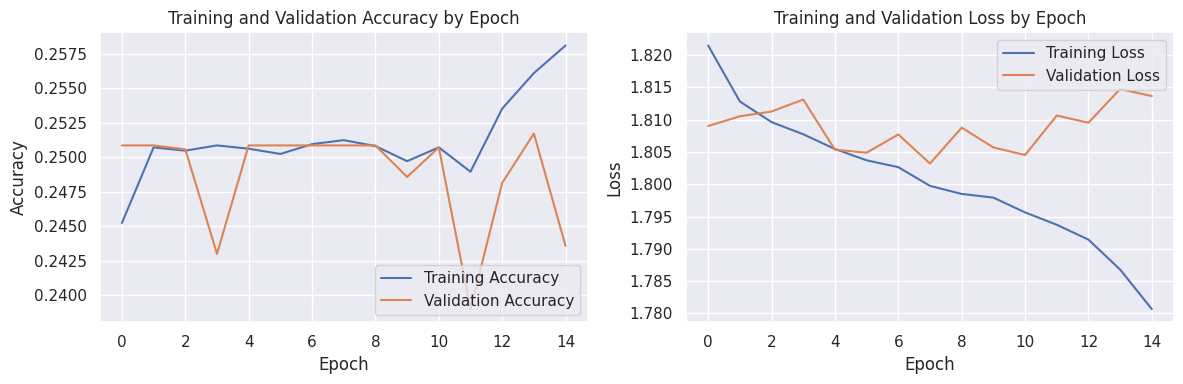

In [7]:
plt.figure(figsize=(12, 4))

# First subplot: Accuracy and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Second subplot: Loss and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [8]:
if not os.path.exists('models'):
    os.makedirs('models')
    
model_mp.save('models/multilayer_perceptron.keras')

# <font color="8C3061" >**Máquina de aprendizaje con pesos binarios $\{-1,1\}$**</font> 

Construcción del modelo:

In [9]:
# Custom layer with binary weights
class BinaryDense(Dense):
    def __init__(self, units, **kwargs):
        super(BinaryDense, self).__init__(units, **kwargs)

    # Override the build method to binarize weights
    def build(self, input_shape):
        super(BinaryDense, self).build(input_shape)

    # Override the call method to binarize weights
    def call(self, inputs):
        # Binarize the weights (during the forward pass)
        binary_weights = K.sign(self.kernel)
        # Use binary weights in the forward pass
        return K.dot(inputs, binary_weights) + self.bias


In [10]:
np.random.seed(42)

# BNN Model for multi-class classification
model_bw = Sequential([
    BinaryDense(500, input_shape=(144,), activation='relu'),  # Input size is 144 for 12x12 images
    BinaryDense(256, activation='relu'),
    BinaryDense(128, activation='relu'),
    BinaryDense(64, activation='relu'),
    BinaryDense(7, activation='softmax')  # 6 classes, using softmax for multi-class classification
])

# Compile the model for multi-class classification
model_bw.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
              metrics=['accuracy'])

Resumen del modelo:

In [11]:
# Summary of the model
model_bw.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ binary_dense (BinaryDense)      │ (None, 500)            │        72,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_dense_1 (BinaryDense)    │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_dense_2 (BinaryDense)    │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_dense_3 (BinaryDense)    │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_dense_4 (BinaryDense)    │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,363 (946.73 KB)

 Trainable params: 242,363 (946.73 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo:

In [12]:
# Train the model
history_bw = model_bw.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1493 - loss: 4.8683 - val_accuracy: 0.1567 - val_loss: 4.5758
Epoch 2/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1513 - loss: 4.4172 - val_accuracy: 0.1596 - val_loss: 4.2504
Epoch 3/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1500 - loss: 4.2090 - val_accuracy: 0.1613 - val_loss: 4.0471
Epoch 4/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1475 - loss: 3.9645 - val_accuracy: 0.1619 - val_loss: 3.9910
Epoch 5/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1527 - loss: 4.0040 - val_accuracy: 0.1614 - val_loss: 3.9086
Epoch 6/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1470 - loss: 3.9009 - val_accuracy: 0.1617 - val_loss: 3.8425
Epoch 7/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1511 - loss: 3.8747 - val_accuracy: 0.1617 - val_loss: 3.7528
Epoch 8/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1535 - loss: 3.7590 - val_accuracy: 0.

Supervición del Overfitting:

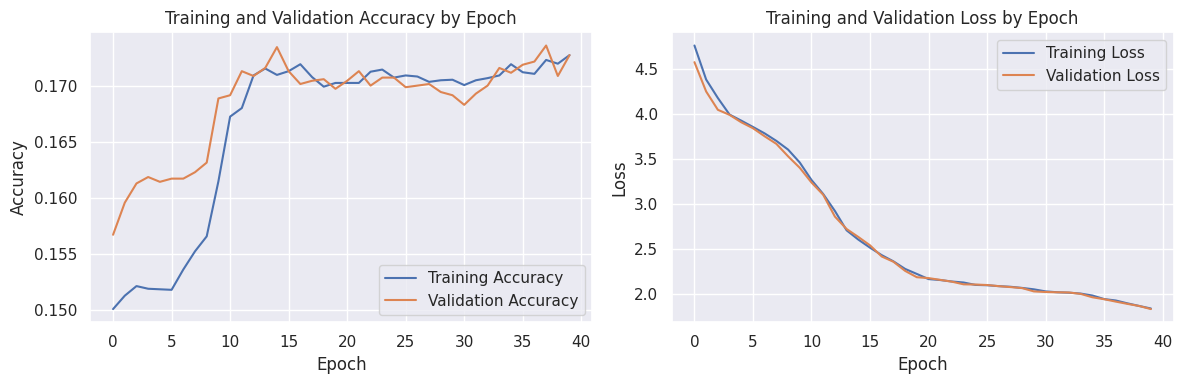

In [13]:
plt.figure(figsize=(12, 4))

# First subplot: Accuracy and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history_bw.history['accuracy'], label='Training Accuracy')
plt.plot(history_bw.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Second subplot: Loss and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history_bw.history['loss'], label='Training Loss')
plt.plot(history_bw.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [14]:
model_bw.save('models/ml_binary_weights.keras')

# <font color="8C3061" >**Máquina de Aprendizaje Extremo**</font> 

## <font color="8C3061" >**No regularización**</font>

In [15]:
np.random.seed(42)
# Define the Extreme Learning Machine class
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        # Randomly initialize the weights between the input layer and hidden layer
        self.input_weights = np.random.randn(input_size, hidden_size) * 0.5
        # Randomly initialize the biases for the hidden layer
        self.biases = np.random.randn(hidden_size) * 0.5
        self.hidden_size = hidden_size
        self.output_size = output_size
    
    # Activation function (sigmoid)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Train the ELM by finding the output weights
    def train(self, X_train, y_train):
        # Compute the hidden layer output
        H = self.sigmoid(np.dot(X_train, self.input_weights) + self.biases)
        
        # Compute the pseudo-inverse of H to get the output weights
        H_pseudo_inv = pinv(H)
        
        # Compute the output weights (beta)
        self.output_weights = np.dot(H_pseudo_inv, y_train)
    
    # Predict on new data
    def predict(self, X):
        # Compute hidden layer output
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)
        # Compute the final output
        output = np.dot(H, self.output_weights)
        return output

# Function to convert predictions to class labels
def convert_predictions(output):
    ss = np.zeros_like(output)
    ss[np.argmax(output,axis=1).min()]=1
    return ss

def convert_predictions_to_onehot(predictions, num_classes):
    # Step 1: Convert probabilities/logits to class indices using argmax
    class_indices = np.argmax(predictions, axis=1)
    
    # Step 2: Convert class indices to one-hot encoding
    one_hot_predictions = np.eye(num_classes)[class_indices]
    
    return one_hot_predictions

# Save the ELM model parameters
def save_elm_model(elm, filepath):
    np.savez(filepath, input_weights=elm.input_weights, biases=elm.biases, output_weights=elm.output_weights)
    print(f"ELM model saved to {filepath}.npz")

# Example usage with your data
# Assume x_train, y_train, x_test, y_test are available and y is already one-hot encoded
input_size = 12 * 12  # 144 inputs for 12x12 images
hidden_size = 500     # Number of hidden neurons (tunable)
output_size = 7       # 6 classes for emotions

# Initialize the ELM
elm = ELM(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# Train the ELM
elm.train(X_train, y_train)

# Save the model to the 'models' directory
save_elm_model(elm, 'models/elm_model')

ELM model saved to models/elm_model.npz


In [16]:
# Predict on the test set
predictions = elm.predict(X_test)
# Convert the output to class labels
predicted_labels = convert_predictions_to_onehot(predictions=predictions,num_classes=7)
accuracy = accuracy_score(y_test, predicted_labels)
print(accuracy)

0.22657142857142856


## <font color="8C3061" >**Regularización Lasso**</font>

In [17]:
np.random.seed(42)

class ELMWithLasso:
    def __init__(self, input_size, hidden_size, output_size, alpha=1.0):
        self.input_weights = np.random.randn(input_size, hidden_size) * 0.5
        self.biases = np.random.randn(hidden_size) * 0.5
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.alpha = alpha
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def train(self, X_train, y_train):
        # Hidden layer output
        H = self.sigmoid(np.dot(X_train, self.input_weights) + self.biases)
        
        # Reshape y_train to match the expected input for Lasso
        y_train = y_train.reshape(-1, self.output_size)
        
        # Lasso regression for each output class
        self.output_weights = np.zeros((self.hidden_size, self.output_size))
        for i in range(self.output_size):
            lasso = Lasso(alpha=self.alpha)
            lasso.fit(H, y_train[:, i])
            self.output_weights[:, i] = lasso.coef_
    
    def predict(self, X):
        # Hidden layer output
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)
        
        # Final output prediction
        output = np.dot(H, self.output_weights)  # Note: no transpose needed here
        return output

# Function to convert predictions to one-hot encoded format
def convert_predictions_to_onehot(predictions, num_classes):
    class_indices = np.argmax(predictions, axis=1)
    one_hot_predictions = np.eye(num_classes)[class_indices]
    return one_hot_predictions


In [18]:
input_size = 12 * 12  # 144 inputs for 12x12 images
hidden_size = 2000     # Number of hidden neurons (tunable)
output_size = 7       # 7 classes for emotions
alpha = 0.1      # Lasso regularization strength

# Initialize the ELM with Lasso regularization
elm_lasso = ELMWithLasso(input_size=input_size, hidden_size=hidden_size, output_size=output_size, alpha=alpha)


# Train the ELM with Lasso
elm_lasso.train(X_train, y_train)

# Predict on the test set
predictions = elm_lasso.predict(X_test)

# Convert the output to one-hot encoded predictions
one_hot_predictions = convert_predictions_to_onehot(predictions, output_size)

# Evaluate the performance
accuracy_lasso = accuracy_score(y_test, one_hot_predictions)
print('Test Accuracy:',accuracy_lasso)

Test Accuracy: 0.13857142857142857


In [19]:
save_elm_model(elm_lasso,'elm_lasso_model')

ELM model saved to elm_lasso_model.npz


## <font color="8C3061" >**Regularización Ridge**</font>

In [20]:
np.random.seed(42)
# Define the Extreme Learning Machine class with Ridge regularization
class ELMWithRidge:
    def __init__(self, input_size, hidden_size, output_size, alpha=1.0):
        # Randomly initialize the weights between the input layer and hidden layer
        self.input_weights = np.random.randn(input_size, hidden_size) * 0.5
        # Randomly initialize the biases for the hidden layer
        self.biases = np.random.randn(hidden_size) * 0.5
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.alpha = alpha  # Ridge regularization parameter
    
    # Activation function (sigmoid)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Train the ELM using Ridge for regularization
    def train(self, X_train, y_train):
        # Compute the hidden layer output
        H = self.sigmoid(np.dot(X_train, self.input_weights) + self.biases)
        
        # Reshape y_train to match the expected input for Ridge
        y_train = y_train.reshape(-1, self.output_size)
        
        # Use Ridge regression to compute the output weights with regularization
        self.output_weights = np.zeros((self.hidden_size, self.output_size))
        for i in range(self.output_size):
            ridge = Ridge(alpha=self.alpha)
            ridge.fit(H, y_train[:, i])
            self.output_weights[:, i] = ridge.coef_
    
    # Predict on new data
    def predict(self, X):
        # Compute hidden layer output
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)
        # Compute the final output
        output = np.dot(H, self.output_weights)  # No transpose needed here
        return output

In [21]:
input_size = 12 * 12  # 144 inputs for 12x12 images
hidden_size = 500     # Number of hidden neurons (tunable)
output_size = 7       # 6 classes for emotions
alpha = 0.01          # Ridge regularization strength

elm_ridge = ELMWithRidge(input_size=input_size, hidden_size=hidden_size, output_size=output_size, alpha=alpha)


# Train the ELM with Ridge
elm_ridge.train(X_train, y_train)

# Predict on the test set
predictions = elm_ridge.predict(X_test)

# Convert to one-hot encoded predictions
one_hot_predictions = convert_predictions_to_onehot(predictions, output_size)

# Evaluate accuracy
accuracy = accuracy_score(y_test,one_hot_predictions)
print('accuracy:',accuracy_lasso)

accuracy: 0.13857142857142857


In [22]:
# Save the model
save_elm_model(elm_ridge, 'models/elm_ridge_model')

ELM model saved to models/elm_ridge_model.npz


## <font color="8C3061" >**Regularización ElasticNet**</font>

In [23]:
np.random.seed(42)
# Define the Extreme Learning Machine class with ElasticNet regularization
class ELMWithElasticNet:
    def __init__(self, input_size, hidden_size, output_size, alpha=1.0, l1_ratio=0.5):
        # Randomly initialize the weights between the input layer and hidden layer
        self.input_weights = np.random.randn(input_size, hidden_size) * 0.5
        # Randomly initialize the biases for the hidden layer
        self.biases = np.random.randn(hidden_size) * 0.5
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.alpha = alpha  # Regularization strength
        self.l1_ratio = l1_ratio  # Mix ratio for L1 (Lasso) and L2 (Ridge) penalties
    
    # Activation function (sigmoid)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Train the ELM using ElasticNet regularization
    def train(self, X_train, y_train):
        # Compute the hidden layer output
        H = self.sigmoid(np.dot(X_train, self.input_weights) + self.biases)
        
        # Reshape y_train to match the expected input for ElasticNet
        y_train = y_train.reshape(-1, self.output_size)
        
        # Use ElasticNet regression to compute the output weights with L1/L2 regularization
        self.output_weights = np.zeros((self.hidden_size, self.output_size))
        for i in range(self.output_size):
            elasticnet = ElasticNet(alpha=self.alpha, l1_ratio=self.l1_ratio)
            elasticnet.fit(H, y_train[:, i])
            self.output_weights[:, i] = elasticnet.coef_
    
    # Predict on new data
    def predict(self, X):
        # Compute hidden layer output
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)
        # Compute the final output
        output = np.dot(H, self.output_weights)  # No transpose needed here
        return output

In [24]:
# Initialize the ELM with ElasticNet regularization
input_size = 12 * 12  # 144 inputs for 12x12 images
hidden_size = 500     # Number of hidden neurons (tunable)
output_size = 7       # 6 classes for emotions
alpha = 0.01          # Regularization strength
l1_ratio = 0.5        # Mix of L1 and L2 regularization (0.5 is an equal mix)

elm_elasticnet = ELMWithElasticNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size, alpha=alpha, l1_ratio=l1_ratio)

# Train the ELM with ElasticNet
elm_elasticnet.train(X_train, y_train)

# Predict on the test set
predictions = elm_elasticnet.predict(X_test)

# Convert to one-hot encoded predictions
one_hot_predictions = convert_predictions_to_onehot(predictions, output_size)

# Evaluate accuracy
accuracy = accuracy_score(y_test, one_hot_predictions)
print('Test Accuracy:',accuracy )

# Save the model
save_elm_model(elm_elasticnet, 'models/elm_elasticnet_model')


Test Accuracy: 0.13857142857142857
ELM model saved to models/elm_elasticnet_model.npz
